<p style="text-align:center;font-weight: bold;">  </p>
<p style="text-align:center;color:navy;font-weight:700; opacity: 1;font-size:30px;">EXTRACCIÓN DE DATOS DE LA WEB DEL BCRP</p>
<p style="text-align:center;font-size:18px;color:navy;font-size:20px;"> utilizando su API y la librería Requests (Python) </p>
<p style="text-align:center;font-weight: bold;">  </p>

<p style='text-align: justify;'> 

Una forma de descargar los datos de la página web del BCRP <a href="https://estadisticas.bcrp.gob.pe/estadisticas/series/" style="color: navy; text-decoration: underline;text-decoration-style: dotted;">(BCRPData)</a> es a través de su API (interfaz de programación de aplicaciones), la cual permite consultar series estadísticas actualizadas desde otras aplicaciones web de forma directa.

En este ejercicio, se utiliza la librería REQUESTS y el método GET(URL) para realizar las peticiones al API del BCRP y poder consultar los datos. La estructura de la URL es la siguiente:
    
`"https://estadisticas.bcrp.gob.pe/estadisticas/series/api/[códigos_de_series]/[formato_de_salida]/[periodo_inicial]/[periodo_final]/[idioma]"`
</p>

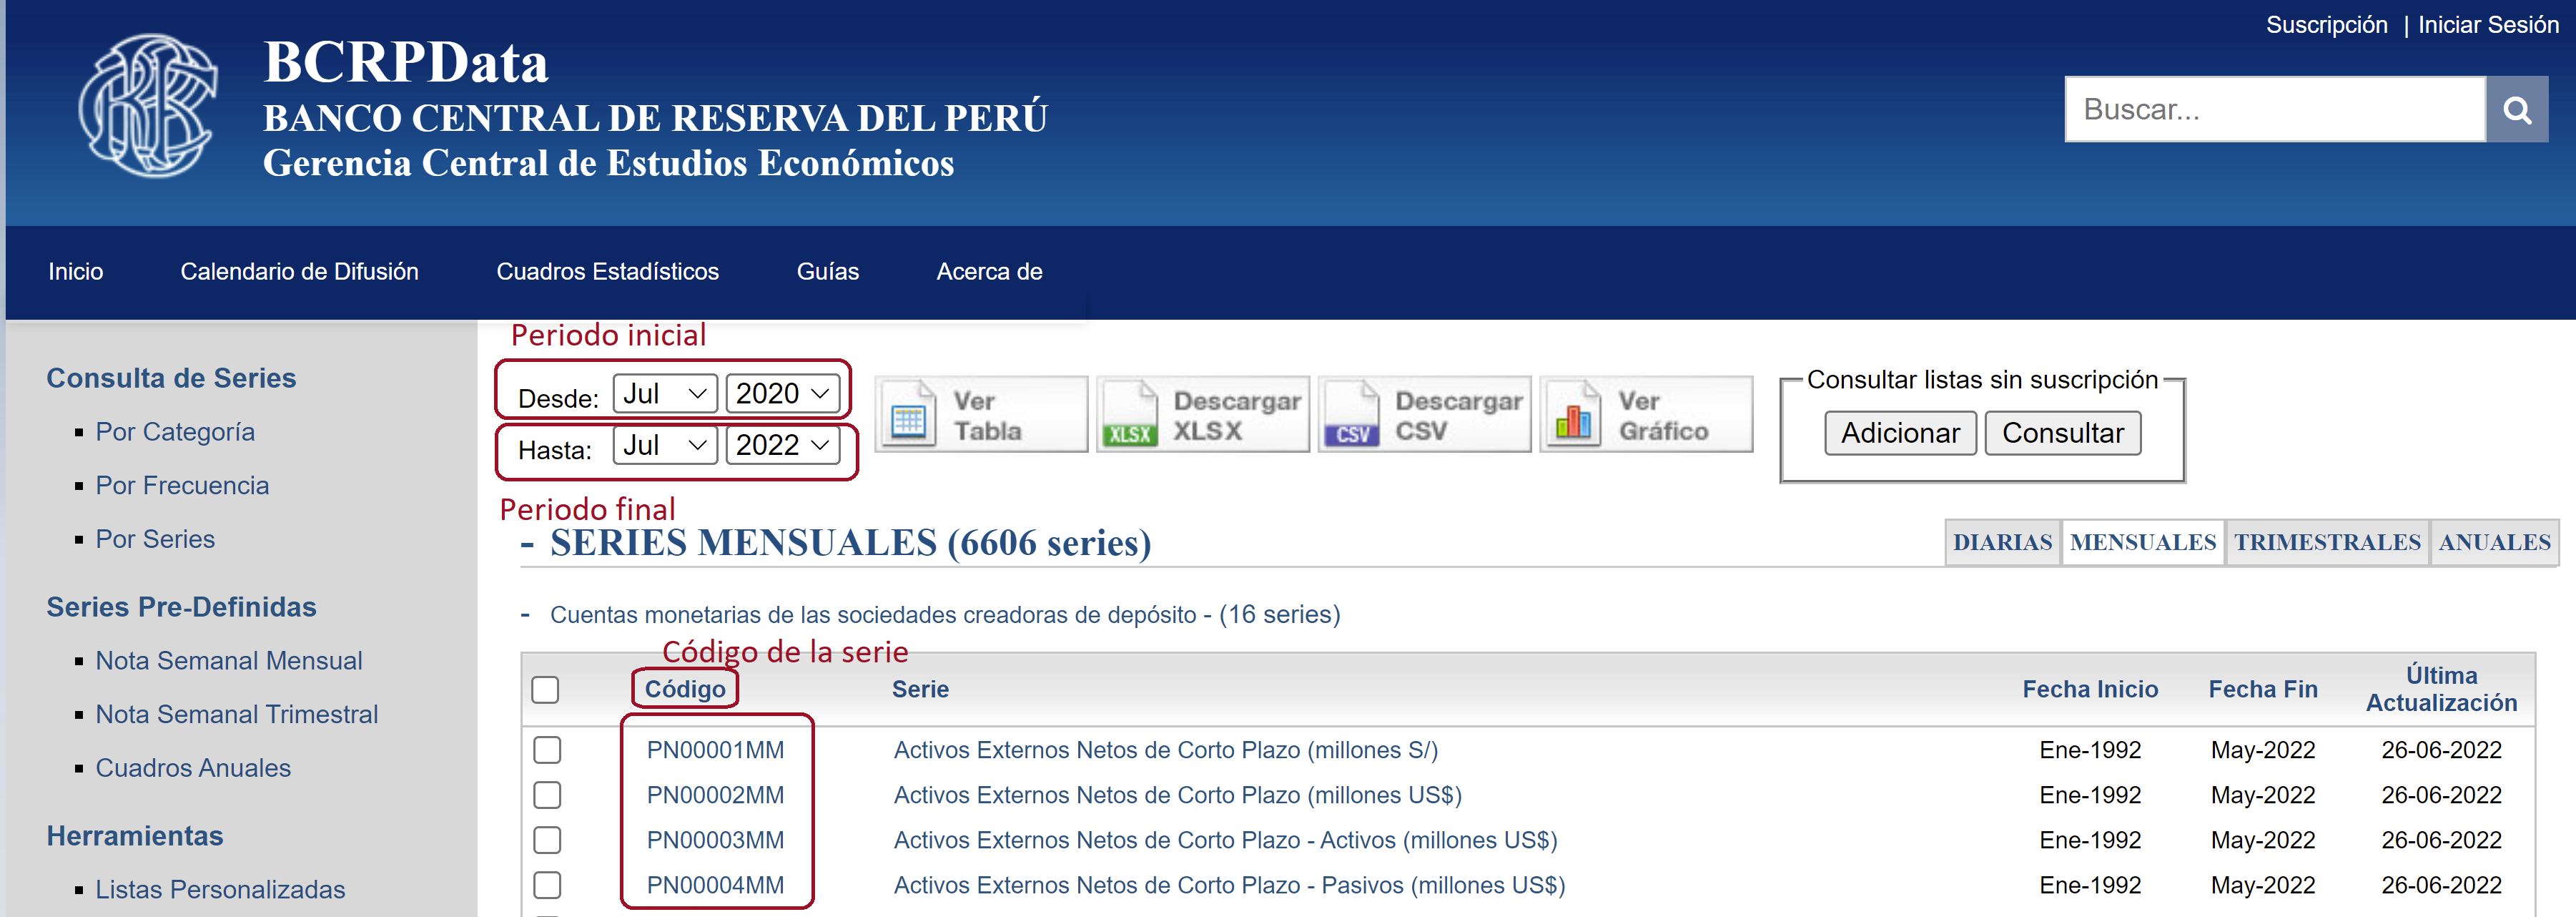

<p style='text-align: justify;'> 
    
Con relación a los parámetros utilizados para la descarga, se precisa lo siguiente:

- `[códigos_de_series]`: El código de la serie es el único parámetro obligatorio (se pueden descargar entre 1 y 10 series de la misma frecuencia y deben estar separados por un guión). En este ejercicio, se optó por descargar cada serie de forma independiente y no 10 a la vez. 
- `[formato_de_salida]`: Los datos pueden ser extraídos en diferente formatos de salida como HTML, XLS, XML, JSON, CSV, entre otros.
- `[periodo_inicial]/[periodo_final]`:Si no se colocan los periodos, por defecto se mostrarán los datos más actuales de las series. En el caso que se coloque un solo periodo, se asumirá como una consulta de una fecha.
- `[idioma]`: Los resultados se pueden generar en idioma español (esp) o inglés (ing). Se debe señalar que en el ejercicio no se logró descargar los datos en inglés cambiando el parámetro de "esp" a "ing"

Revisar la <a href="https://estadisticas.bcrp.gob.pe/estadisticas/series/ayuda/api" style="color: navy; text-decoration: underline;text-decoration-style: dotted;">Guía de uso de API para desarrolladores del BCRP</a> para mayor detalle.
    
A continuación, se siguieron los siguientes pasos para poder descargar los datos, colocarlos en un dataframe, revisarlos y exportarlos en un archivo csv (BCRP_base.csv).
    
</p>

<p style="text-align:left;color:navy;font-weight:700; opacity: 1;font-size:20px;">1. Construir estructura de consultas (URL)</p>

In [1]:
urlprincipal="https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"

#parámetros
lista_codigos=["PN01770AM","PN38705PM","PN01210PM","PD38049AM","RD38085BM","RD38086BM","RD38087BM","RD38088BM","RD38089BM","RD38090BM","RD38091BM"] #colocar los códigos de las series que quieres descargar 
formato="/json"
periodo="/2020-1/2022-6"
idioma ="/ing"

#generar lista de URL
lista_url=[]
for codigo in lista_codigos:
    url=urlprincipal+codigo+formato+periodo+idioma
    lista_url.append(url)
lista_url


['https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01770AM/json/2020-1/2022-6/ing',
 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN38705PM/json/2020-1/2022-6/ing',
 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01210PM/json/2020-1/2022-6/ing',
 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD38049AM/json/2020-1/2022-6/ing',
 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/RD38085BM/json/2020-1/2022-6/ing',
 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/RD38086BM/json/2020-1/2022-6/ing',
 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/RD38087BM/json/2020-1/2022-6/ing',
 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/RD38088BM/json/2020-1/2022-6/ing',
 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/RD38089BM/json/2020-1/2022-6/ing',
 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/RD38090BM/json/2020-1/2022-6/ing',
 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/R

<p style="text-align:left;color:navy;font-weight:700; opacity: 1;font-size:20px;">2. Enviar solicitudes con el método GET a las URL especificadas</p>

In [2]:
# Para crear una solicitud/petición get se utiliza la linbería requests y el el método get:  requests.get(url, params={key: value}, args), 
# que devuelve un código de estado como respuesta a la solicitud. Por ejemplo, la Respuesta 200 
# significa que la solicitud fue exitosa y hay una resultado; mientras que la respuesta 404 significa
# que el recurso que estaba buscando no fue encontrado.

import requests #librería request
lista_response=[] # se crea lista donde se guardarán respuestas
for url in lista_url:
    response=requests.get(url) # get(url) devuelve un objeto response que se asigna a la variable "response" se obtiene respuesta
    lista_response.append(response) # se agregan respuestas en lista_response
lista_response

[<Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>]

<p style="text-align:left;color:navy;font-weight:700; opacity: 1;font-size:20px;"> 3. Revisar estructura de respuestas (http consultadas) </p>

In [3]:
# se revisa la primera respuesta de lista_response
response0=lista_response[0]
response0
response0_json=response0.json()
response0_json # se observa que es un diccionario con dos llaves: config y periods

{'config': {'title': 'Producto bruto interno y demanda interna (índice 2007=100)',
  'series': [{'name': 'Producto bruto interno y demanda interna (índice 2007=100) - PBI',
    'dec': '1'}]},
 'periods': [{'name': 'Jan.2020', 'values': ['161.792628951275']},
  {'name': 'Feb.2020', 'values': ['160.855800722568']},
  {'name': 'Mar.2020', 'values': ['137.328875245188']},
  {'name': 'Apr.2020', 'values': ['103.256848999759']},
  {'name': 'May.2020', 'values': ['118.28819558614']},
  {'name': 'Jun.2020', 'values': ['139.33801744899']},
  {'name': 'Jul.2020', 'values': ['153.762994699039']},
  {'name': 'Aug.2020', 'values': ['156.724587155803']},
  {'name': 'Sep.2020', 'values': ['161.866810759322']},
  {'name': 'Oct.2020', 'values': ['170.555237217205']},
  {'name': 'Nov.2020', 'values': ['170.489577153081']},
  {'name': 'Dec.2020', 'values': ['191.49983754064']},
  {'name': 'Jan.2021', 'values': ['160.54682570835']},
  {'name': 'Feb.2021', 'values': ['155.30627559764']},
  {'name': 'Mar.20

In [4]:
type(response0_json) 

dict

<p style="text-align:left;color:navy;font-weight:700; opacity: 1;font-size:20px;"> 4. Seleccionar variables y agregarlas en un Dataframe </p>

<p style="text-align:left;color:navy;font-weight:700; opacity: 1;font-size:15px;"> variable fecha</p>

In [5]:
fechas=[]

datos = response0_json["periods"]

for i in datos:
    fecha=i['name']
    fechas.append(fecha) 

print(fechas[:]) 

['Jan.2020', 'Feb.2020', 'Mar.2020', 'Apr.2020', 'May.2020', 'Jun.2020', 'Jul.2020', 'Aug.2020', 'Sep.2020', 'Oct.2020', 'Nov.2020', 'Dec.2020', 'Jan.2021', 'Feb.2021', 'Mar.2021', 'Apr.2021', 'May.2021', 'Jun.2021', 'Jul.2021', 'Aug.2021', 'Sep.2021', 'Oct.2021', 'Nov.2021', 'Dec.2021', 'Jan.2022', 'Feb.2022', 'Mar.2022', 'Apr.2022']


<p style="text-align:left;color:navy;font-weight:700; opacity: 1;font-size:15px;"> variables macroeconómicas </p>

In [6]:
#Agregar todas las variables macroeconómicas consultadas en un dataframe

import pandas as pd # libería para crear dataframe 

df = pd.DataFrame() # se crea dataframe en donde se almacenarán los datos

for response in lista_response: # para cada respuesta...
    
    response_json=response.json() #se convierte la respuesta en un JSON
    datos=response_json["periods"] # se seleccionan los valores de la llave "periods"
    nombre =response_json['config']["series"][0]["name"] # se obtiene el nombre de cada serie 
   
    valores=[]  
    
    for i in datos: # para cada elemento de response_json["periods"]
        
        valores_lista=i['values']  # obtengo el valor de la llave/key "values"  
                                   # i ={'name': 'Jan.2018', 'values': ['154.573488940953']}
                                   # i["values"] --> ['154.573488940953']
        for v in valores_lista:    #converito cada valor a float
            v=float(v)
            valores.append(v)      #agrego cada valor a la variable valores
   
    df[nombre] = pd.DataFrame(valores) # se va agregando cada variable con su nombre respectivo  en el dataframe df 

df[0:2]

,Producto bruto interno y demanda interna (índice 2007=100) - PBI,Índice de precios Lima Metropolitana (índice Dic.2021 = 100) - Índice de Precios al Consumidor (IPC),Tipo de cambio - promedio del periodo (S/ por US$) - Bancario - Promedio,Expectativas Macroeconómicas - Expectativa de TC a 12 meses,Exportaciones por Departamento (Valores FOB en millones de US$) - Amazonas,Exportaciones por Departamento (Valores FOB en millones de US$) - Ancash,Exportaciones por Departamento (Valores FOB en millones de US$) - Apurimac,Exportaciones por Departamento (Valores FOB en millones de US$) - Arequipa,Exportaciones por Departamento (Valores FOB en millones de US$) - Ayacucho,Exportaciones por Departamento (Valores FOB en millones de US$) - Cajamarca,Exportaciones por Departamento (Valores FOB en millones de US$) - Callao
0,161.792629,92.189571,3.327364,3.349792,0.943048,311.084978,226.380877,321.082174,50.318607,121.865363,180.391756
1,160.855801,92.320639,3.390350,3.370833,0.453598,300.742088,133.568672,301.391650,62.606419,113.608954,175.516996


<p style="text-align:left;color:navy;font-weight:700; opacity: 1;font-size:15px;"> Agregar variable fecha en dataframe como índice</p>

In [7]:
df["periodo"] = fechas
df=df.set_index('periodo')
df[0:5]

,Producto bruto interno y demanda interna (índice 2007=100) - PBI,Índice de precios Lima Metropolitana (índice Dic.2021 = 100) - Índice de Precios al Consumidor (IPC),Tipo de cambio - promedio del periodo (S/ por US$) - Bancario - Promedio,Expectativas Macroeconómicas - Expectativa de TC a 12 meses,Exportaciones por Departamento (Valores FOB en millones de US$) - Amazonas,Exportaciones por Departamento (Valores FOB en millones de US$) - Ancash,Exportaciones por Departamento (Valores FOB en millones de US$) - Apurimac,Exportaciones por Departamento (Valores FOB en millones de US$) - Arequipa,Exportaciones por Departamento (Valores FOB en millones de US$) - Ayacucho,Exportaciones por Departamento (Valores FOB en millones de US$) - Cajamarca,Exportaciones por Departamento (Valores FOB en millones de US$) - Callao
periodo,,,,,,,,,,,
Jan.2020,161.792629,92.189571,3.327364,3.349792,0.943048,311.084978,226.380877,321.082174,50.318607,121.865363,180.391756
Feb.2020,160.855801,92.320639,3.390350,3.370833,0.453598,300.742088,133.568672,301.391650,62.606419,113.608954,175.516996
Mar.2020,137.328875,92.917030,3.491364,3.410000,0.423079,300.039631,143.555283,244.257108,94.358579,76.097208,124.921485
Apr.2020,103.256849,93.014206,3.397500,3.389167,0.705117,182.542395,2.307146,134.076659,35.916349,86.771117,88.205362
May.2020,118.288196,93.204097,3.421150,3.392708,1.304715,45.027553,95.677127,237.830452,12.110999,68.171425,71.378360


<p style="text-align:left;color:navy;font-weight:700; opacity: 1;font-size:20px;">5. Revisar series de dataframe </p>

In [8]:
df.describe(include = 'all')

,Producto bruto interno y demanda interna (índice 2007=100) - PBI,Índice de precios Lima Metropolitana (índice Dic.2021 = 100) - Índice de Precios al Consumidor (IPC),Tipo de cambio - promedio del periodo (S/ por US$) - Bancario - Promedio,Expectativas Macroeconómicas - Expectativa de TC a 12 meses,Exportaciones por Departamento (Valores FOB en millones de US$) - Amazonas,Exportaciones por Departamento (Valores FOB en millones de US$) - Ancash,Exportaciones por Departamento (Valores FOB en millones de US$) - Apurimac,Exportaciones por Departamento (Valores FOB en millones de US$) - Arequipa,Exportaciones por Departamento (Valores FOB en millones de US$) - Ayacucho,Exportaciones por Departamento (Valores FOB en millones de US$) - Cajamarca,Exportaciones por Departamento (Valores FOB en millones de US$) - Callao
count,28.000000,28.000000,28.000000,28.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,163.098528,95.909989,3.702305,3.676417,3.409576,324.214898,170.986343,314.230195,60.162336,131.785264,184.396148
std,19.497711,3.131703,0.227353,0.287607,3.161529,129.344678,96.352894,90.527992,24.843474,47.833795,80.297242
min,103.256849,92.189571,3.327364,3.349792,0.423079,45.027553,2.307146,134.076659,12.110999,68.171425,71.378360
25%,159.591266,93.360444,3.545324,3.455729,0.883565,282.141379,124.095786,280.443830,48.408377,100.157873,117.637146
50%,165.010078,94.943764,3.672363,3.529688,2.305698,327.626586,168.579998,301.219466,60.949465,117.737158,187.439161
75%,174.091900,98.438826,3.894542,3.913594,5.417103,405.239462,253.051706,362.047564,71.673660,175.983637,228.667116
max,195.119184,102.816232,4.107477,4.208125,10.142830,532.729174,289.836057,470.107427,105.036924,209.106793,337.645282


In [9]:
df.info() # revisar series: formato y nulos (se aprecia que algunas series no tienen datos para algunas fechas)

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Jan.2020 to Apr.2022
Data columns (total 11 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Producto bruto interno y demanda interna (índice 2007=100) - PBI                                      28 non-null     float64
 1   Índice de precios Lima Metropolitana (índice Dic.2021 = 100) - Índice de Precios al Consumidor (IPC)  28 non-null     float64
 2   Tipo de cambio - promedio del periodo (S/ por US$) - Bancario - Promedio                              28 non-null     float64
 3   Expectativas Macroeconómicas - Expectativa de TC a 12 meses                                           28 non-null     float64
 4   Exportaciones por Departamento (Valores FOB en millones de US$) - Amazonas                        

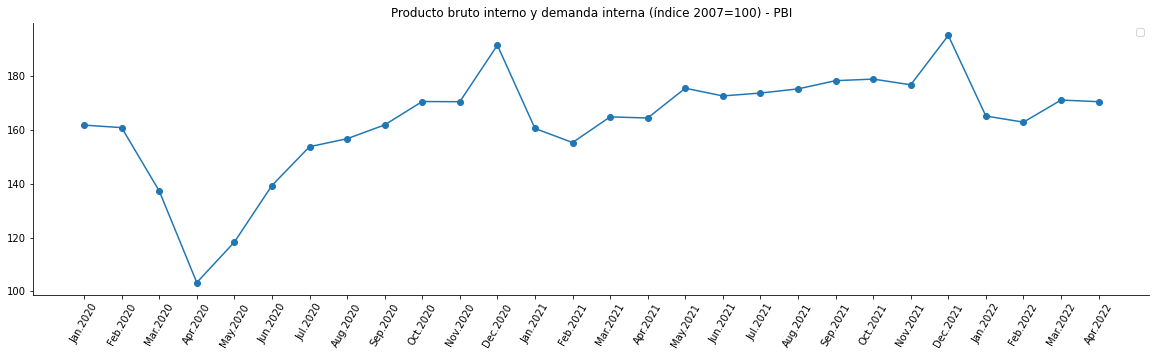

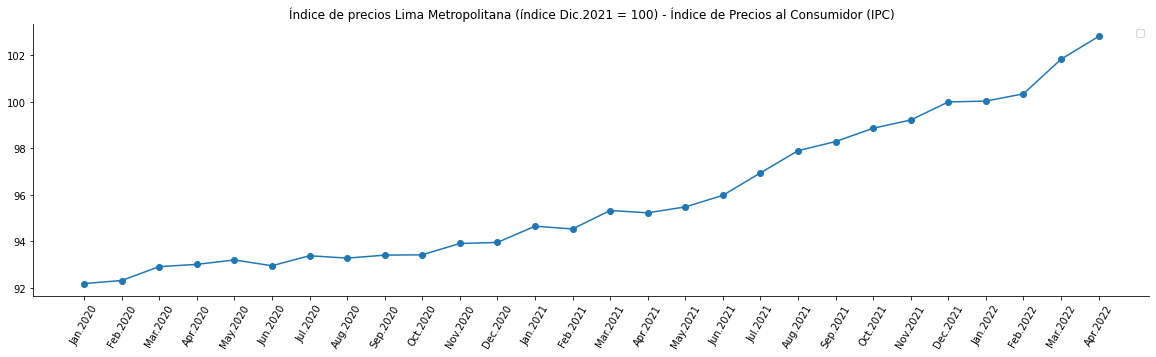

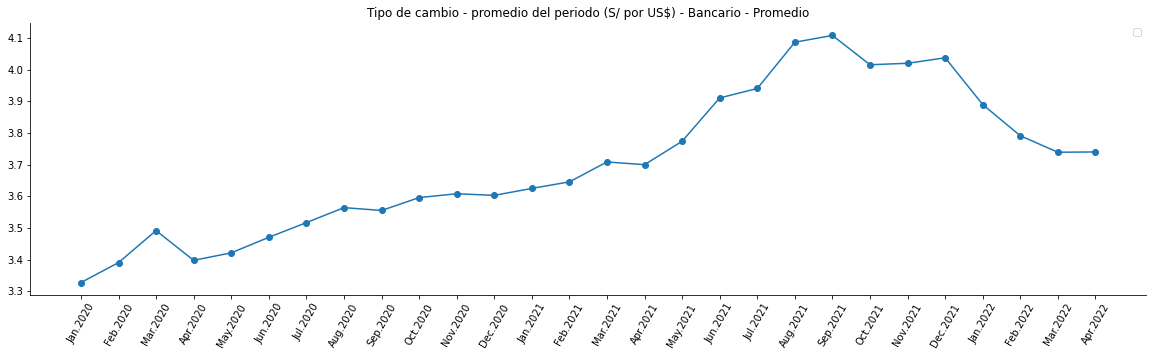

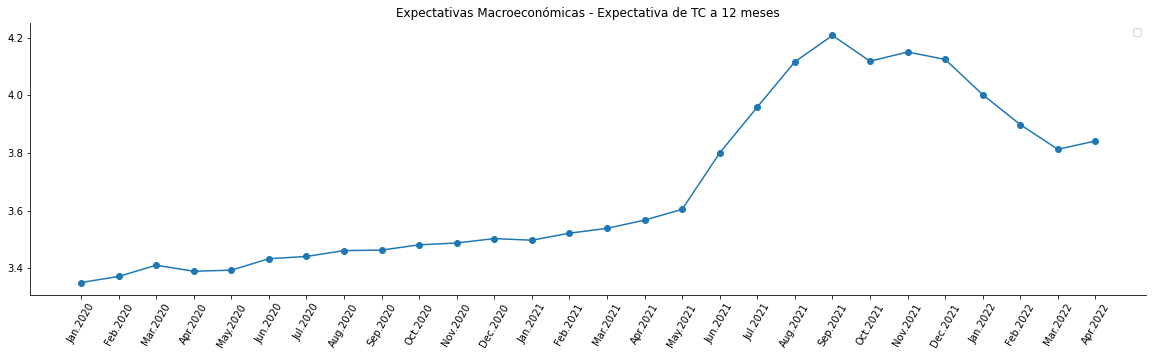

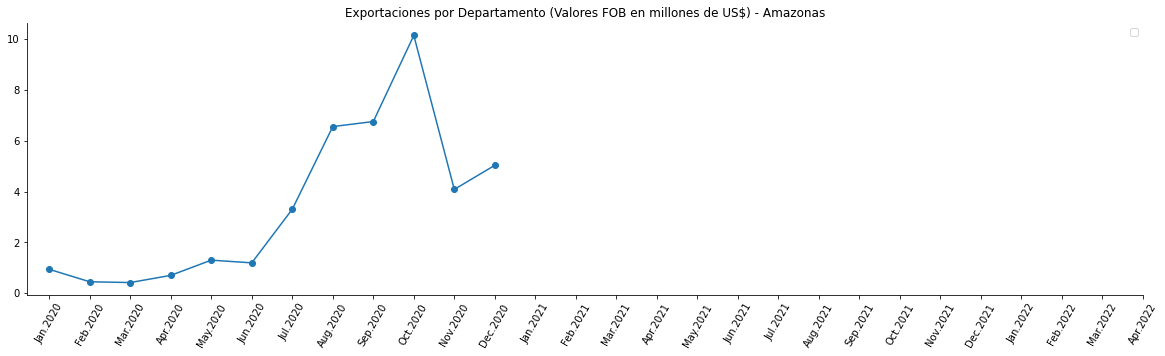

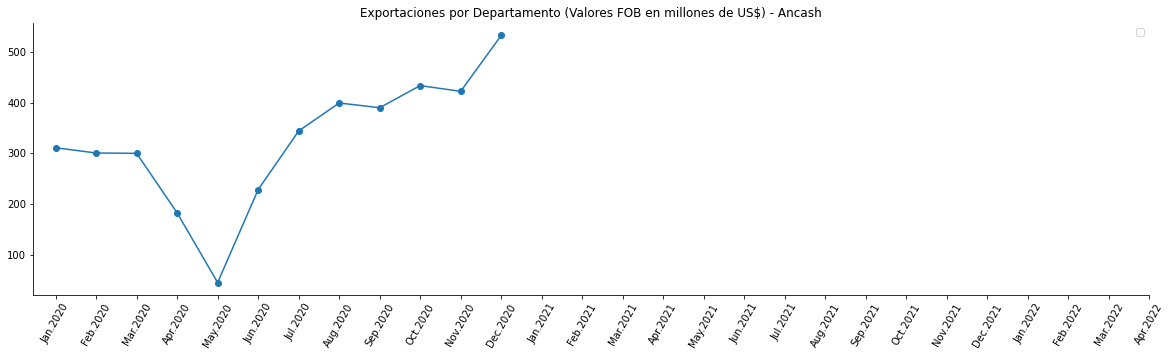

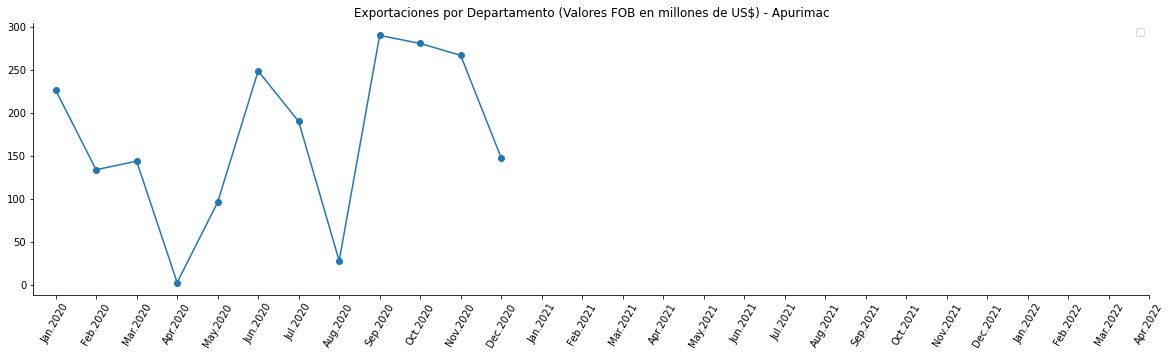

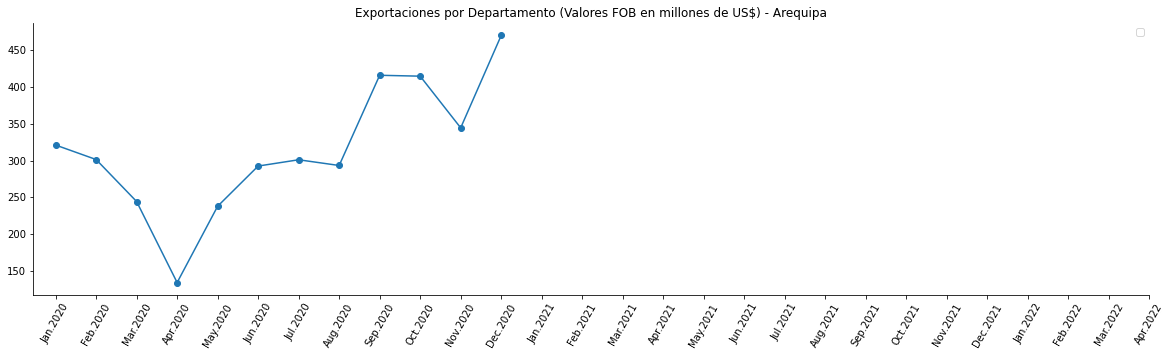

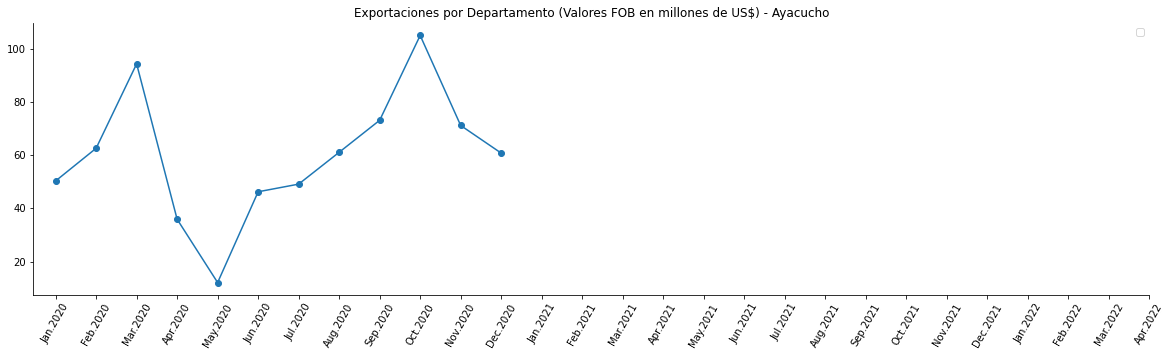

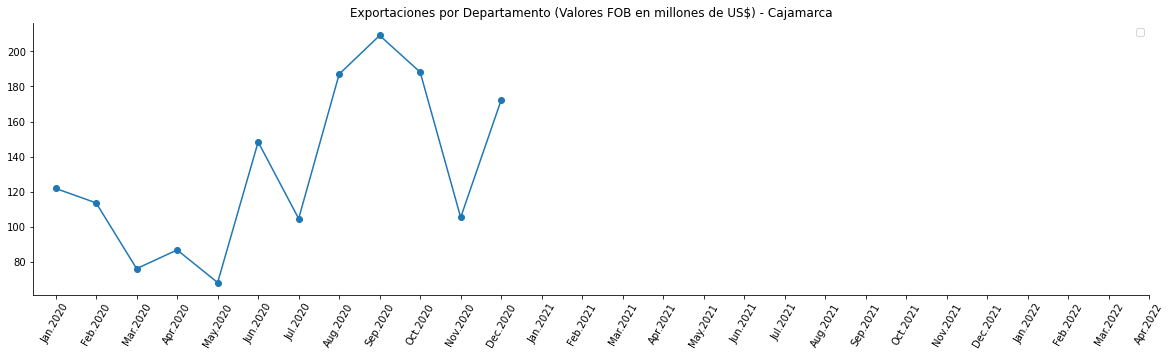

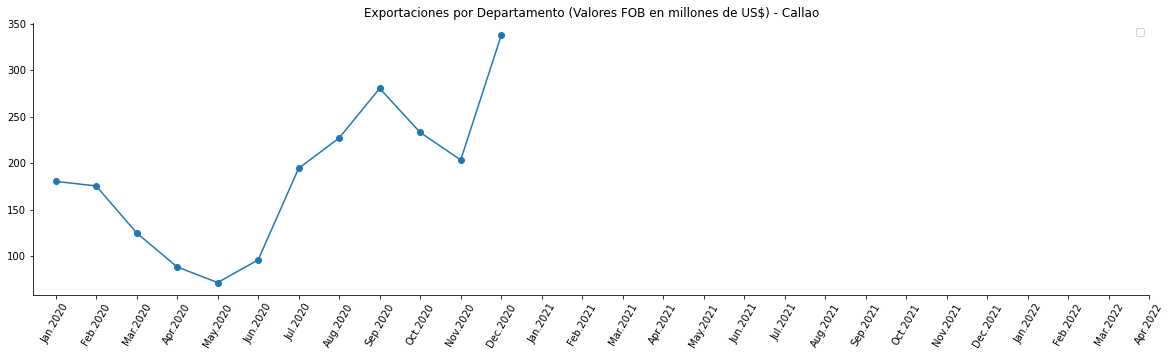

In [10]:
# se realizan algunos gráficos de línea de las series

import matplotlib.pyplot as plt

for var in df.columns: 
    fig, ax = plt.subplots(figsize = (20, 5))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    plt.title(var)

    plt.plot(df[var],  linestyle = "-", label = df.columns, marker = "o") 
    plt.xticks(df[var].index, rotation =60);
    plt.legend([])
    plt.show()


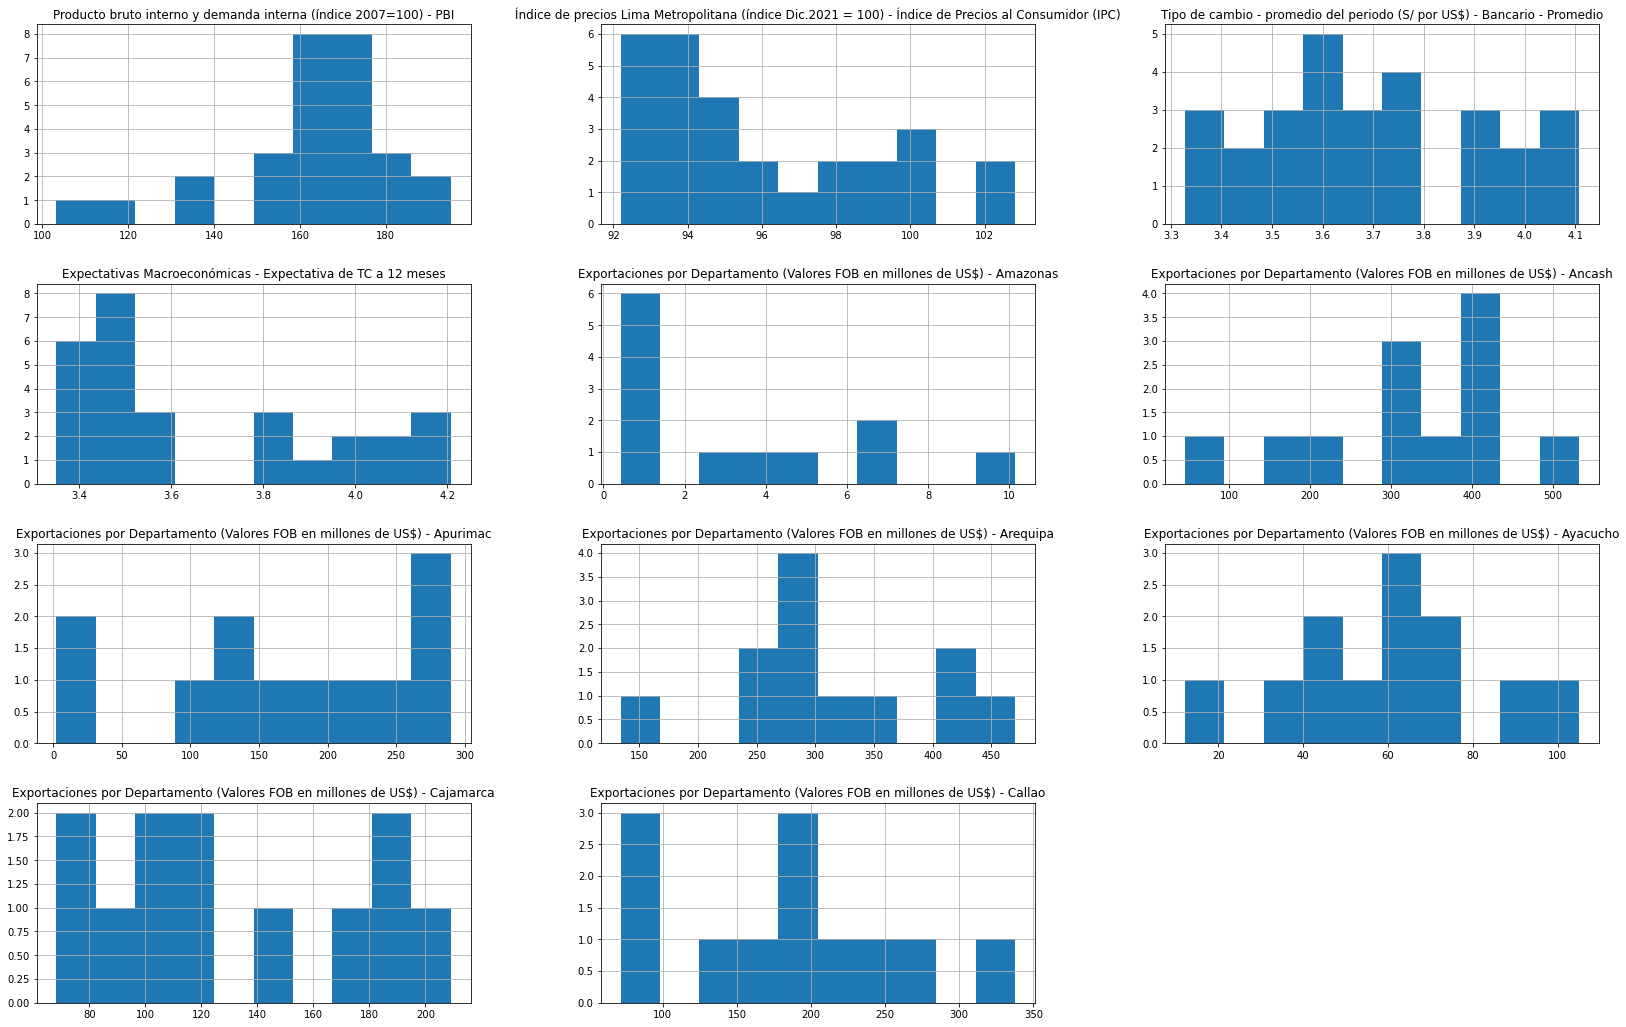

In [11]:
# se elaboran histogramas
df.hist(figsize = (28, 18));

<p style="text-align:left;color:navy;font-weight:700; opacity: 1;font-size:20px;">6. Guardar Dataframe en un archivo csv </p>

In [13]:
df.to_csv('BCRP_base.csv', header=True, index=True, encoding='utf-8-sig')